# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача** — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Открытие данных и получение информации

In [1]:
import pandas as pd #импортировала библиотеку pandas
import matplotlib.pyplot as plt #импортировала библиотеку matplotlib

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #открыла файл и сохранила в переменную data
except:
    data = pd.read_csv('C:\\Users\\User\\OneDrive\\Рабочий стол\\проекты\\Исследование о продаже квартира в СПБ\\real_estate_data.csv', sep='\t')

data.head(10) #вывела на экран первые 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


При первой визуальной оценке датафрейма видно, что данные подходят к цели нашего исследования и в них присутствуют изначально заданыые параметры (пользовательские и картографические). Также видно,что в таблице есть пропущенные значения, столбцы с разными типами данных,названия столбцов записаны по разному. Да и не все столбцы мы видим на экране. Поэтому для более полной картины выводим общую информацию о датафрейме на экран.

In [3]:
data.info() #вывела общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После получения общей информации видно что:
* в таблице содержится 23700 строк и 22 столбца. Такого колличества данных вполне достаточно для проведения анализа.
* представлены данные 4 типов: булевые значения, целые числа, вещетвенные числа и объекты
* названия столбцов не приведены к единому стилю
* в 14 столбцах есть пропущенные значения

Также для визуальной оценки данных таблицы построим гистрограммы по столбцам с числовыми данными

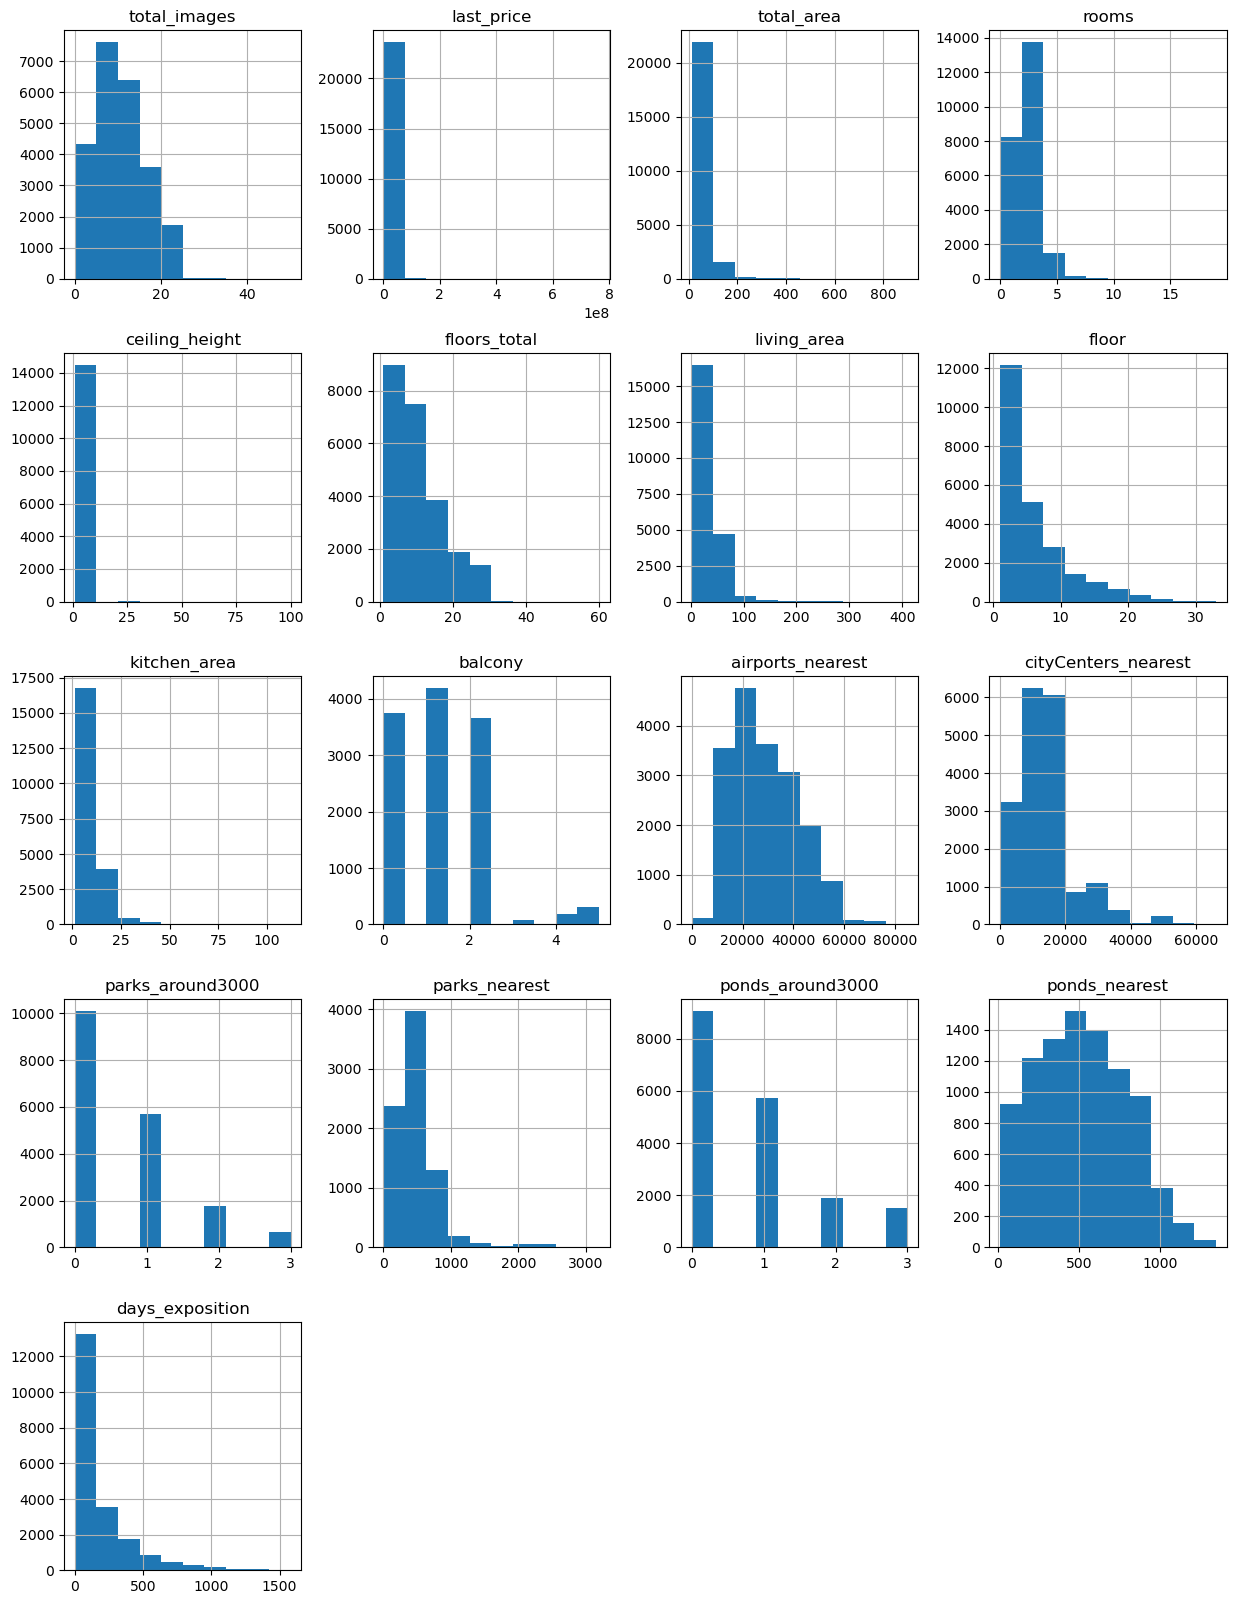

In [4]:
data.hist(figsize=(15, 20)); #гистограммы по числовым столбцам датафрейма, размером 15 на 20

По данным гистограмм можно понять как часто встречаются данные в диапозоне значений. Видно что в каких-то данных есть аномальные значения, где-то есть выбросы и тд. Для более точного анализа требуется провести предобработку исходных данных.

### Предобработка данных

#### Переименование столбцов

Для начала переименуем некоторые столбцы датафрейма, чтобы все они были в едином стиле:

In [5]:
data = data.rename( 
 columns={ 
'cityCenters_nearest': 'city_centers_nearest', 
'parks_around3000': 'parks_around_3000', 
'ponds_around3000': 'ponds_around_3000', 
 } 
) #переименовала 3 столбца
data.columns #вывела еще раз названия столбцов,чтобы убедиться что все корректно 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Поиск пропущенных значений

Далее для анализа необходимо найти и посчитать пропущенные значения в столбцах

In [6]:
data.isna().sum() #сумма пропущенных значений по каждому столбцу датафрейма

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Найдены пропущенные значения в 14 столбцах датафрейма:

Далее будем работать с пропусками в каждом из столбцов в отдельности:

**1. ceiling_height** — *высота потолков (м).В данном столбце проопущенно 9195 значений, это около 38% от всех данных. Достаточно много, поэтому просто удалить эти данные мы не можем. Т.к. эта колличесвенная перемнная стоит заменить эти значени на средние или медианные. Чтобы понять на что лучше заменить посмотри общую информацию о столбце:*

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#заменяем пропущенные значения в стодбце "высота потолков" на медиану, т.к. есть отдельные выбросы в столбце

data['ceiling_height'].isna().sum() #проверяем наличие пропусков в данном столбце

0


**2. floors_total** — *всего этажей в доме. Колличество пропусков 86 это менее 0.3% от общего колличества данных. Скорее всего эти данные были просто не заполнены пользователями. Т.к. данный фактор не влияет на корректность информации о площади и стоимость квартиры даннеы пропуски оставим в данных.

In [9]:
data['floors_total'] = data['floors_total'].fillna(0)
#заменяем пропущенные значения в стодбце "колличество этажей" на 0, чтобы не удалять пропущенные значения
#и оставить все данные для дальнейшего анализа и смены типа данных на целые числа

data['floors_total'].isna().sum() #проверяем наличие пропусков в данном столбце

0

**3. living_area** — *жилая площадь в квадратных метрах (м²). Колличество пропусков 1903, это около 8% от всех данных. Т.к. Это колличественная переменная попробуем посчитать среднее и медианное значение:*

In [10]:
living_area_avr = data['living_area'].mean() #считаем среднее значение в столбце "жилая площадь"
living_area_avr


34.45785242760111

In [11]:
living_area_med = data['living_area'].median() #считатем медианное значение в столбце "жилая площадь"
living_area_med

30.0

Предположим, что мы заменим пропуски средним или медианным значением. Тогда получится что площадь квартир, в которых были допущены пропуски, будет не более чем 1-комнатной( врядли существуют квартиры с двумя комнатами в которых 34 кв.м.). А если в этой квартире 3,4 или более комнат? Тогда заменять данные на среднее значение будет не совсем корректно. Т.к. колличество пропусков не критично 8% то пока оставим данные с пропусками о жилой площади.

**4.is_apartment** — *апартаменты. Столбец в котором получились самые большое колличетсво пропусков в данных-20924. Это около 88%. Слишком большое колличество для того чтобы оставить эти пропуски не тронутыми. Т.к. это столбец принимает только 2 значения: True или False, будем считать что пользователи просто его пропускали, т.е. объект недвижимости не является апартаментами. Что вполне подтвреждается реальностью, ведь апартаментов не так много в сравнени с квартирами*

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False) #меняем пропускки на значение False

data['is_apartment'].isna().sum() #Проверяем колличетсво пропусков в столбце

0

**5.kitchen_area** — *площадь кухни в квадратных метрах (м²). Колличество пропусков 2278, что составлет около 9% от общего колличества данных. Возможно данные пропуски допущены по причине того что в квартире вообще нет кухни,например квартира-студия  или квартира со свободной планировкой.*

In [13]:
data['studio'].value_counts() #считаем колличество квартир-студий


False    23550
True       149
Name: studio, dtype: int64

In [14]:
data['open_plan'].value_counts()#считаем колличество квартир со свободной планировкой

False    23632
True        67
Name: open_plan, dtype: int64

В исходных данных содержится информация о 146 квартирах-студиях и 67 квартирах со свободной плаанировкой, что не совпадает в с колличетсвом пропусков. Значит не факт что эти пропуски были допущены из-за того что квартира является студией. Т.к. их процент незначителен оставим данные в этом стодбце в таком виде

**6.balcony** — *число балконов. Колличество пропусков 11519. Что составляет почти 50% от всех данных. Т.к. это тип данных пользовательский тип данных, можно предположить что пользовтели пропускали этот пункт из-за отсутствия балкона. Поэтому в данном случае заменим пропуски на значение 0*

In [15]:
data['balcony'] = data['balcony'].fillna(0) #заменяем пропуски в столбце "балконы" на значение 0
data['balcony'].isna().sum() #проверяем колличество пропусков

0

**7.locality_name** — *название населённого пункта. Колличество пропусков в данном столбце 49, что составляет менее 1% от всех данных. Можно спокойно удалить эти пропуски.*

In [16]:
data = data.dropna(subset=['locality_name']) #удаляем пропущенные значения в столбце "название населённого пункта"

data['locality_name'].isna().sum() #проверяем наличие пропусков в данном столбце

0

**8.airports_nearest**-*расстояние до ближайшего аэропорта в метрах (м). Колличество пропусков 5542, что составляет 23%.*  **сity_center_nearest** -расстояние до центра города в метрах. Колличество пропусков 5519, что составляет также примерно 23%. 
**parks_nearest**-расстояние до ближайщего парка в метрах. Колличество пропусков 15620, что составляет 65% от общего колличетсва данных.  
Чтобы заполнить данные столбцы необходимо узнать в каких населенных пунктах находятся объекты недвижимости в которых были допущены пропуски и есть ли там парки или аэопопрт, и гоород ли это вообще. Эти данные мы получить не можем, поэтому оставим пропуски.



**11.parks_around_3000 и ponds_around_3000**- *число парков и водоемов в радиусе 3 км. Количество пропущенных значений в данных столбцах совпадает и равняется 5518. Можно предположить что это пропущенные значения получлись при выгрузке данных и уточнить это у того кто предоставил данные на анализ. Но т.к. на данный момент это возможности нет поступим по-другому: Данные столбцы содержат информацию о колличестве водоемов и парков рядом. Возможно пользователи оставляли это поле пустым,т.к. парков и водоемов в радиусе 3 км просто нет, т.е. их 0.*

In [17]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0) 
#заменяем пропуски в столбце "колличество парков в радиусе 3 км" на 0

data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
#заменяем пропуски в столбце "колличество водоемов в радиусе 3 км" на 0

print(data['parks_around_3000'].isna().sum()) #проверяем колличество пропусков
data['ponds_around_3000'].isna().sum() #проверяем колличество пропусков

0


0

**12.days_exposition** — *сколько дней было размещено объявление (от публикации до снятия). Колличество пропусков в данном столбце составляет 3181. Т.к. мы не знаем дату выгурзки таблицы, то не можем посчитать колличество дней размещения объявления. Будем считать что данные объявления еще активны, и оставим данные пропуски.*

Мы удалили или заменили все пропуски в случаях где это возможно и логично. Проверим еще раз информацию и пропусках в датафрейме:

In [18]:
data.isna().sum() #сумма пропущенных значений по каждому столбцу датафрейма

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000           0
parks_nearest           15586
ponds_around_3000           0
ponds_nearest           14565
days_exposition          3180
dtype: int64

#### Изменение типов данных

Для дальнейшего анализа также лучше проверить типы данных, чтобы можно было корректно строить метрики и делать выводы.
Повторно выведем на экран информацию с типами данных в столбцах датафрейма:

In [19]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around_3000       float64
parks_nearest           float64
ponds_around_3000       float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Из всех столбцов, типы данных я решила поменять только в этих:  
* balcony — число балконов. Балоконов может быть только целое число, не может быть половинка балкона. Поэтому меняем тип данных на целое число
* days_exposition — сколько дней было размещено объявление (от публикации до снятия). Также колличество дней публикации считается целыми днями. Даже если объявление было опубликовано и снято в один день-это засчитается как 1 день. Поэтому меняем тип данных на целое число. Но так как в этом столбце есть пропуски которые мы решили оставить, то NaN на целое число не поменять. Оставим этот столбец как он и есть.
* first_day_exposition — дата публикации. Переведем из формата объект в формат даты и времени.
* floors_total — всего этажей в доме. Также колличество этажей в доме не может быть 5.5 или 3.2, поэтому меняем тип данным на целое число.
* parks_around_3000 — число парков в радиусе 3 км. Также меняем на целое число, потому что не может быть половина парка рядом.
* ponds_around_3000 — число водоёмов в радиусе 3 км. Также меняем на целое число, потому что не может быть половина водоема рядом.

In [20]:
data['balcony'] = data['balcony'].astype('int')
#смена типа данных на целое число в столбце "балконы"

data['floors_total'] = data['floors_total'].astype('int') 
#смена типа данных на целое число в столбце "число этажей"

data['parks_around_3000'] = data['parks_around_3000'].astype('int')
#смена типа данных на целое число в столбце "парки в радиусе 3 км"

data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')
#смена типа данных на целое число в столбце "водоемы у радиусе 3 км"

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
#смена типа данных на целое число в столбце "дата публикации"

In [21]:
data.dtypes #повторно проверяем типы данных, что все поменялось корректно

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Устранение дубликатов

Следующий пункт по предобработке исходных данных это поиск и устранение дубликатов. В датафрейме дубликаты могли появится в столбце с назавнанием населенного пункта, т.к. это единственный столбец с типов "объект".
Для начала найдем уникальные значения в даном столбце датафрейма.

In [22]:
print(data['locality_name'].nunique()) #выводим колличетсво уникальных значений в столбце "название населенного пункта"
data['locality_name'].unique() #выводим список уникальных значений в столбце "название населенного пункта",
#чтобы отследить какие могут быть дубликаты, потворы, ошибки т.д.

364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из всех уникальных значений заметила следующие дубликаты, которые на следующем шаге буду устранять: 
* существует тип населенного пункт поселок и посёлок- все заменим на поселок
* существует тип населенного пункта городской поселок ,посёлок городского типа и  поселок городского типа-заменим на поселок городского типа
* сушествует Мурино и поселок Мурино-заменим на Мурино
* существует Кудрово и деревня Кудрово-заменим на Кудрово
* существует тип населенного пункта поселок станции и посёлок при железнодорожной станции -заменим на поселок
* существует садоводческое некоммерческое товарищество-заменим на садовое товарищество

In [23]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
print(data['locality_name'].nunique()) #для проверки и сравнения выводим повторно колличесто уникальных значений в столбце

318


Заменен 46 дубликат в столбце "название населенного пункта". С учетом того что вокруг Санкт-Петербурга достаточно много населенных пунктов, примем данное колличество (318) за верное.

#### Выявление аномалий и устрание редкий и выбивающихся значений

Вызовем функцию describe для получения минимального, макимального и медианного значения по каждому столбцу. С помощью нее мы узнаем характерный разброс — то, какие значения оказались вдали от среднего и насколько их много. 

In [24]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.637505,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.613891,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Изучив полученные данные выявила отклонения в следующих столбцах:
* **total_images**-медианное значение достаточно сильно отстает от среднего, возможно в данных этого столбца есть какие-то аномально больше значения которые стоит проверить отдельно
* **total_area**-в данном столбце бросается в глаза макимальное значение которое почти в 17 раз больше медианы.
* **rooms**-в этом столбце также бросается в глаза макимальное значение которое почти в 6 раз больше медианы.
* **ceiling_height**- максимальное значение равно 100 м. Врядли высота потолка в квартире будет ровнятся 100 м. С данными что-то не так, надо проверить
* **living_area**-в это же столбце наоборот, странным кажется минимальное значение. Врядли продаются квартиры с площадью в 2 кв.м.
* **kitchen_area**-среднее и медианное значение здесь вроде похожи на правду, а вот минимальное и максимальное не очень-кухня 1.3 кв.м или наоборот 112 кв.м. не кажется правдоподобным. Возможно данные вносили некорректно
* **days_exposition**- среднее значение сильно превышает медиану, это говорит о том что есть какие то сильно отличающийся значения которые влияют на среднее. Данные этого столбца стоит проверить
* **last_price**- цена на момент снятия с публикации. Сильно выделяется минимальное значение стоимость квартиры. Проверим данный столбец на аномалии

*С каждым из этих столбцов буду работать в отдельности.*

**1. "total_images"-число фотографий в объявлении.**

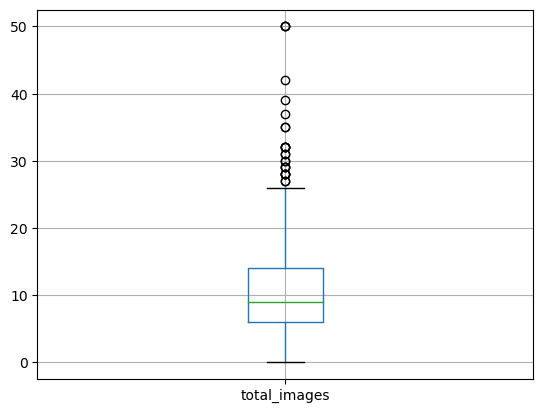

In [25]:
data.boxplot('total_images');#диаграмма размаха по столбцу "колличество фотографий"

Исходя из получившихся данных видно, что часть данных находится за пределами нормальных значений, т.е. эти данные можно отбросить. Третий квартил получился равным 26, т.е. мы удаляем данные в обявлениях которых более 26 фотографий.

23625


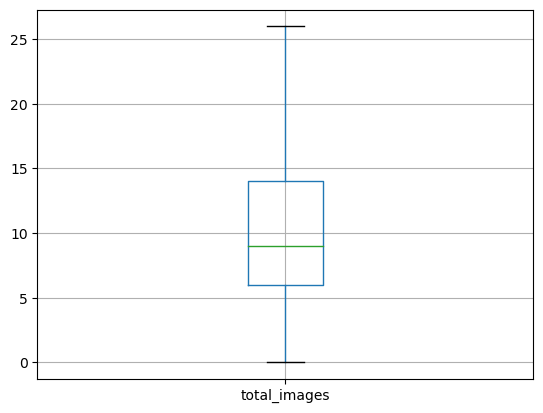

In [26]:
data = data[data.total_images<=26]#оставила данные в датафрйеме в обявлениями в которых фотографий боллее 20
print(data['total_images'].count()) #просматтриваю общее колличество значений в столбце после удаления, чтобы не удалить слишком много
data.boxplot('total_images'); #повторно строим диаграмму, получаем диагрмму разамаха с нормальными значениями

**2.total_area** -общая площадь квартиры в квадратных метрах (м²)

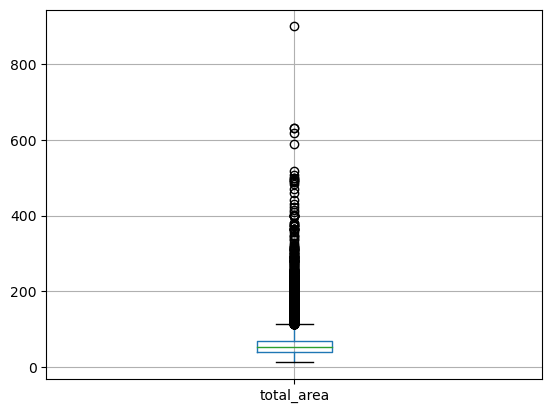

In [27]:
data.boxplot('total_area');#диаграмма размаха по столбцу "площадь квартиры"

В данном случае коллчиество значений выходящих за пределы нормальных кажется очень большим, т.к. точки слились в единую жирную линию. Удалим объявления площадь которых превышает 200 кв.м. Например если в кквартире окажется много комнат,это значение может быть правлопадобным. Да, квартиры с большей площадью могут быть, но это скорее исключение.

In [28]:
print(len(data[data['total_area']>=200]))#cчитаем колличество квартир в которые площадь более 200 кв.м.
# 230 составляет менее 1% от общего числа записей, колличество небольшое, поэтому от них можно избавиться

231


count    23398.000000
mean        58.119472
std         26.486446
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        200.000000
Name: total_area, dtype: float64


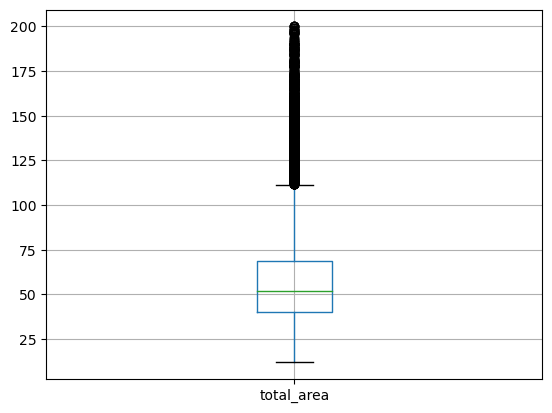

In [29]:
data = data[data.total_area<=200] #удаляю обявления с площадбю квартир более 200 кв.м.
print(data['total_area'].describe())
#числовое описание данных столюца "общая площадь", требется выести повторно, т.к. на предыдущем шаге удалялись значения
data.boxplot('total_area'); #повторно вывожу диаграмму размаха

Диаграмма размаха принимает более менее нормальные значения, которые подходят для дальнейшего анализа. В дальнейший анализ войдут квартиры с площадью от 12 до 200 кв метров, со средним значением 58 кв.м., что похоже на реальность. Минимальное значение оставляем на уровне 12 кв.м.-т.к. такие небольшие квартиры студии дейтсвительно сейчас продаюутся, особенно в старом фонде г.СПб.(расселенные коммуналки)

**rooms** число комнат

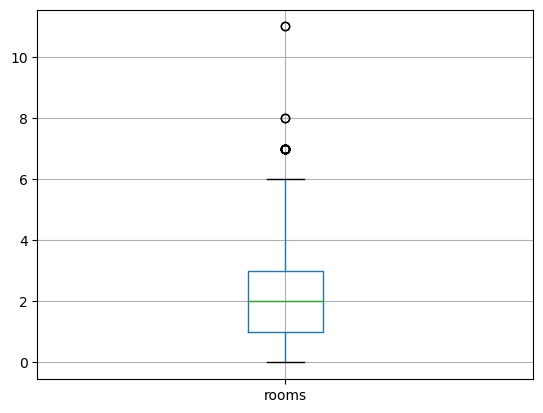

In [30]:
data.boxplot('rooms'); #диаграмма размаха по столбцу "колличество комнат"

Есть одно или несколько выбивающихся значений. Третий квартиль в данном столбце равен 6. Поэтому спокойно значения свыше 6 можно удалять

count    23374.000000
mean         2.027595
std          0.980344
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


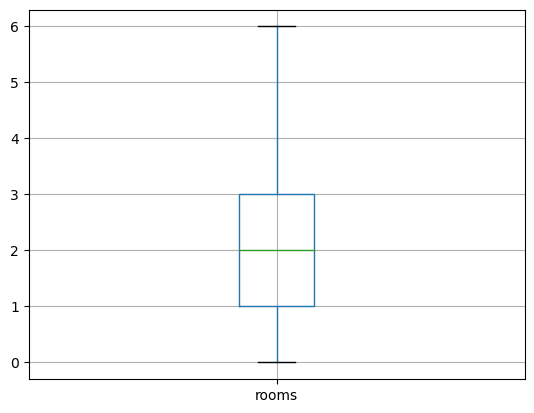

In [31]:
data = data[data.rooms<=6] #удаляем объявления в которых колличество комнат более 6
print(data['rooms'].describe())
#числовое описание данных столбца "колличетсво комнат", требуется вывести повторно, т.к. на предыдущем шаге удалялись значения
data.boxplot('rooms'); #повторно выводи диаграмму размаха

Значения в данном столбце стали нормальными. Минимальное значение комнат равняется 0-в выборке могут обявления с квартирами студиями или свободной планировкой. Максимальное значение комнт равняется 6 что тоже похоже на правдву, такие квартиры существуют, особенно в квартирах с площадью около 200 кв.м которые мы оставили

**ceiling_height**-высота потолков

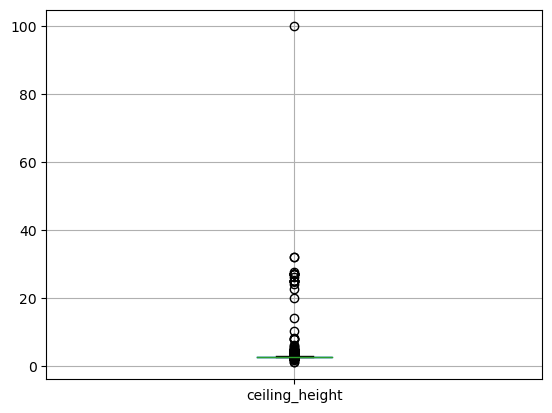

In [32]:
data.boxplot('ceiling_height'); #диаграмма размаха для столбца "высота потолков"

после построения диаграммы размаха особо ничего не понятно,кроме как то что есть сильное выдающееся значение 100 метров.Также есть отдельная группа значений более 20 метров. Предопожим что данные которые вносили пользователи были без запятой :например 26 метров имелось ввиже 2.6 м Заменим все строки с объявлениями высота потолков в которых более 20

In [33]:
data.loc[(data.ceiling_height>20),'ceiling_height'] = data['ceiling_height']*0.1
data['ceiling_height'].describe()

count    23374.000000
mean         2.694603
std          0.268641
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

Колличество объявлений не изменилось, но поменялось максимальяная высота.Теперь она стала 20. Все равно многовато для квартир. Выведем повторно диагруму размаха

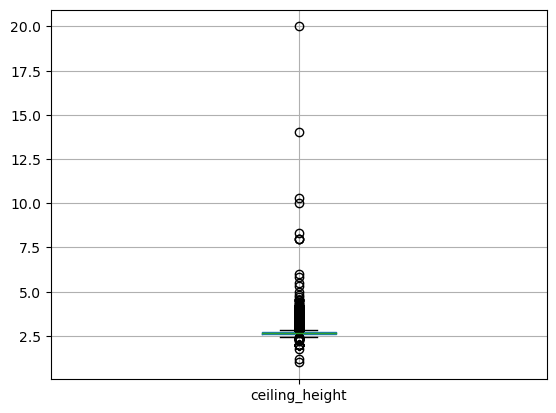

In [34]:
data.boxplot('ceiling_height');

На диаграмме стали более заметны выдающиеся значения более 7.5 м. Это уже не 20м и данное значене более стримится к среднму. Возьмем данное значение за максимальное для выборки. А за минимальное примем нормы СанПин. Минимальная высота потолка при построке жилых помещений в СПб и Лен.обл. не может быть менее 2.2 м.

count    23352.000000
mean         2.692322
std          0.209102
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


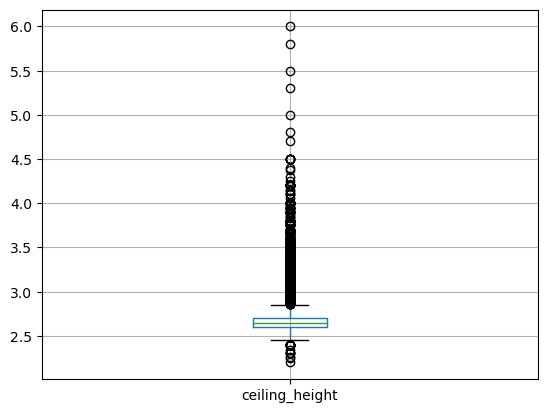

In [35]:
data = data[data.ceiling_height<=7.5] #удаляем значения из столбца "высота потолков" превышающее 7.5 метров
data = data[data.ceiling_height>=2.2] #удаляем значения из столбца "высота потолков" менее 2.2 метров
print(data['ceiling_height'].describe()) 
#числовое описание данных столбца "высота потолков", требуется вывести повторно, т.к. на предыдущем шаге удалялись значения
data.boxplot('ceiling_height'); #повторно выводим диаграмму размаха

**living_area** -общая жилая площадь

count    21485.000000
mean        33.139718
std         17.153914
min          2.000000
25%         18.570000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64


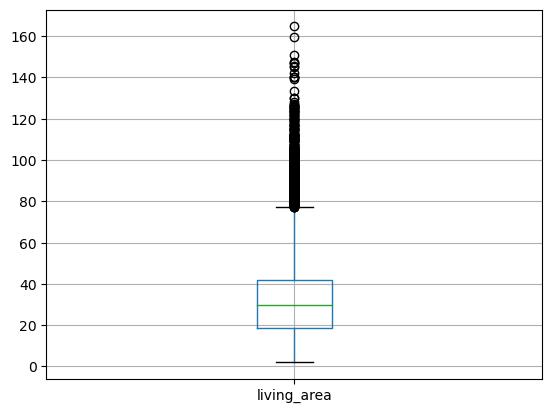

In [36]:
data.boxplot('living_area') #диаграмма размаха по столбцу "жилая площадь"
print(data['living_area'].describe())

Первый квартиль равен 12 метрам, что логично подходит под описание площади жилья. Скорее всего это квартиры перестроенные из старых команулок. Меньше врядли будут, а если будут то это редкие исключения, поэтому данные значения можно отбросить. Максимальное значение в данном столбце кадется реальным. Если мы брали в учет квартиры с 6 комнатами то и площадь их вполне может быть 164 кв.м. с учетом кухни и коридоров.

count    21351.000000
mean        33.284395
std         17.109285
min         12.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64


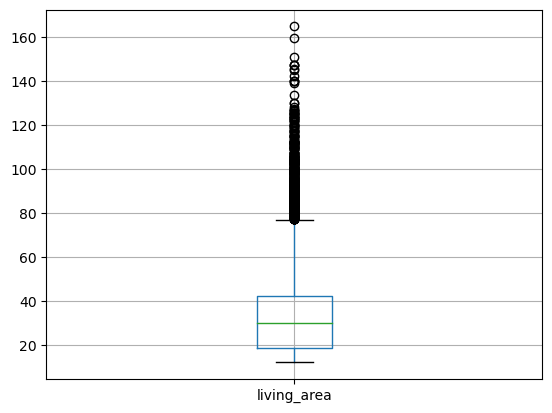

In [37]:
data = data[data.living_area>=12] #удаляем значения в столбце менее 12 кв.м.
data.boxplot('living_area') #cтроим повторно диаграмму размаха
print(data['living_area'].describe()) 
#числовое описание данных столбца "жилая площадь", требуется вывести повторно, т.к. на предыдущем шаге удалялись значения

**kitchen_area** площадь кухни

count    20583.000000
mean        10.303442
std          5.289941
min          1.300000
25%          7.000000
50%          9.000000
75%         11.780000
max         93.200000
Name: kitchen_area, dtype: float64


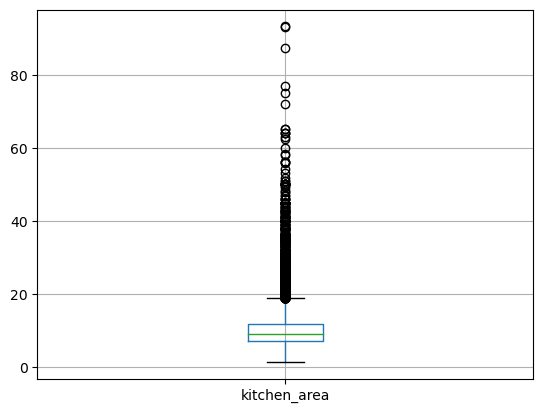

In [38]:
data.boxplot('kitchen_area') #диаграмма размаха по столбцу площадь кухни
print(data['kitchen_area'].describe())

Исходя из полученныхданных получаем минимальную площадь кухни 1.3 кв.м.-такое возможно,если это квартира студия или кв со свободной планировкой. Также значения более 70 кв.м. становятся крайне редкими на диаграмме. Да и в жизни площаль только кухни более 60 кв.м. маловероятно. Удалим эти значения.

count    20577.000000
mean        10.282273
std          5.141290
min          1.300000
25%          7.000000
50%          9.000000
75%         11.780000
max         65.000000
Name: kitchen_area, dtype: float64


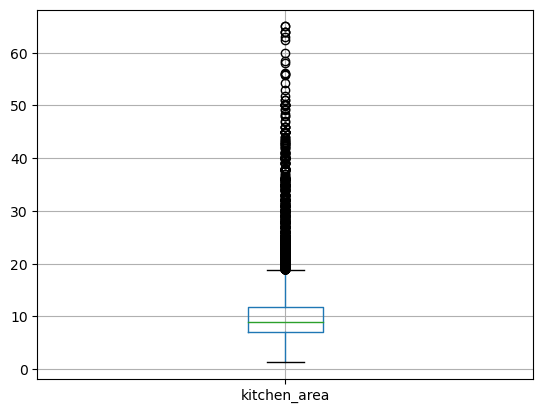

In [39]:
data = data[data.kitchen_area<=70] #Удаляем объявления с площадью кухни более 60 кв.м.
data.boxplot('kitchen_area') #повторная диаграмма размаха
print(data['kitchen_area'].describe()) 
#числовое описание данных столбца "площадь кухни", требуется вывести повторно, т.к. на предыдущем шаге удалялись значения

**days_exposition**-сколько дней было размещено объявление 

1548
count    17753.000000
mean       184.629133
std        220.931127
min          1.000000
25%         44.000000
50%        102.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64


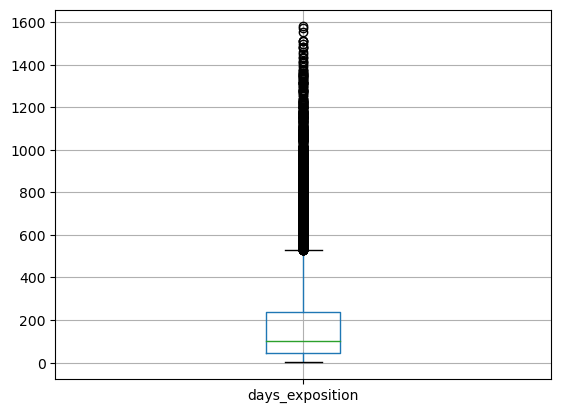

In [40]:
data.boxplot('days_exposition') #диаграмма размаха по столбцу
print (len(data[data['days_exposition']>500])) #колличетсво объявлений со строком размещения более 500 дней
print(data['days_exposition'].describe())

Выводя общую информацию по данному столбцу кажется странным, что максимальное колличество дней размещения раовняется более чем 4 годам. Но еси построить диаграмму размаха и посчитать колличетсво объявлений со сроком размещения более 500 дней получится, что очень многие значения попадают под выбросы.Но каких-то конкертных сильно выделяющихся значений нет. Поэтому в данном столбце я не буду ничего удалять. Оставлю значений как есть

**last_price**- цена на момент снятия с публикации

count    2.057700e+04
mean     6.027196e+06
std      6.156171e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,2.65,5,17.3,4,False,...,8.5,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,5.8,0,поселок городского типа Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
9581,7,450000.0,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,5.5,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0


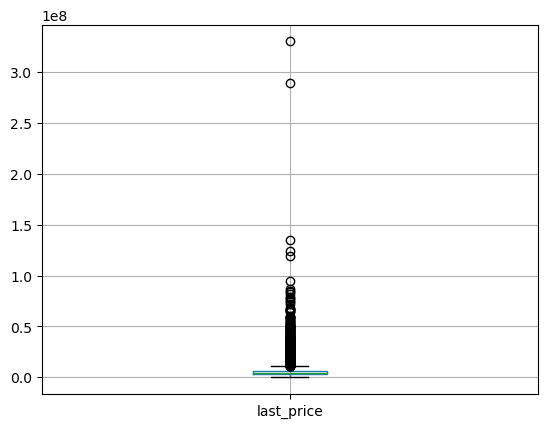

In [41]:
data.boxplot('last_price') #диаграмма размаха по столбцу "цена квартиры"
print(data['last_price'].describe()) #числовая информация по столбцу "цена кварьиры"

#после вывода числовой информации бросается в глаза минимальное значение,
#поэтому для визуализации вывела на экран
#строчки со значением в столбце "цена квартиры" менее 1 квартиля
data.query('last_price<3.500000e+06').sort_values(by='last_price').head()

Видно что минимальное значение не очень похоже на правду,врядли квартира будет стоит 12 т.р. еще и площадью 109 кв.м.
Значение аномальное поэтому его можно удалить.
Максимальное значение здесть тоже бросается в глаза, но его можно обхяснить большой площадью квартиры или элитной недвижимостью. Данные значения удалять не будем.

In [42]:
data = data[data.last_price!=12190.0] #удаляю аномальное значение
data['last_price'].describe() #повторно проверяю числовую информацию по столбцу

count    2.057600e+04
mean     6.027488e+06
std      6.156177e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20576 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20576 non-null  int64         
 1   last_price            20576 non-null  float64       
 2   total_area            20576 non-null  float64       
 3   first_day_exposition  20576 non-null  datetime64[ns]
 4   rooms                 20576 non-null  int64         
 5   ceiling_height        20576 non-null  float64       
 6   floors_total          20576 non-null  int32         
 7   living_area           20576 non-null  float64       
 8   floor                 20576 non-null  int64         
 9   is_apartment          20576 non-null  bool          
 10  studio                20576 non-null  bool          
 11  open_plan             20576 non-null  bool          
 12  kitchen_area          20576 non-null  float64       
 13  balcony         

**После полной предобработки данных было удалено 13% данных. Значения в столбцах остались в пределах нормальных для каждого в отдельности. Сильные выбросы были удалены.Можно приступать к основному анализу**

In [44]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
11,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.0


### Посчитайте и добавьте в таблицу новые столбцы

In [45]:
data['price_sqr_m'] = data['last_price']/data['total_area'] #добавление столбца "цена одного квардратного метра"
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #добавление столбца "день публикации объявления"
data['month_exposition'] = data['first_day_exposition'].dt.month #добавление столбца "месяц публикации объявления"
data['year_exposition'] = data['first_day_exposition'].dt.year #добавление столбца "год публикации объявления"

#добавление столбца тип этажа
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

data['city_center_nearest_km'] = data['city_centers_nearest']/1000
data['city_center_nearest_km'] = data['city_center_nearest_km'].round()
data.head() #повторно проверяю датафрейм, чтобы убедиться что стодбцы добавлены


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqr_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_center_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

#### Изучение параметров объекта

***total_area*** -общая площадь

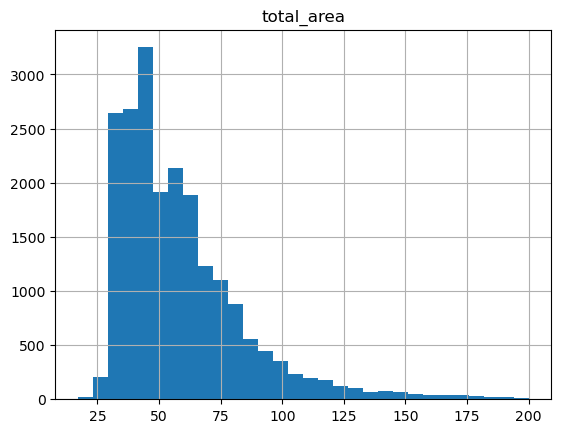

In [46]:
data.hist('total_area', bins=30); #построние гистограммы по общей площади

В нашем исследовани представлены квартиры с площадью от 12 ло 200 кв.м. На гистограмме есть сильно отличающиеся от остальных значения, что отображается на гистограмме сильными пиком. Это означает, что больше всего представлено квартир с общей площадью примерно от 35 до 55 кв.м.(скорее всего это однокмнатные и двухкомнатые квартиры). Менее популярны квартиры с общей площадью примерно от 55 до 65, но их тоже продают достаточно много.(предоположительно однушки-двушки) И примерно одинаковое колличество квартир до 35 кв.м. и от 65 кв.м. до 90 кв.м. (студии и трешки)
Можно сделалть вывод что в СПб и Лен.области преобладают квартиры с метражом до 65 кв.м. Скорее всего это связано с большой многоэтажной застройкой квартир с небольшим метражом или же разделением коммнулок в стартом жилом фонде на небольшиие квартиры-студии. Кв с небольшим метражом легче купить и соответствено легче продать, т.к. стоимомсть на них ниже. И уже очень редко продаются квартиры более 90 кв.м.

***living_area — жилая площадь в квадратных метрах (м²)***


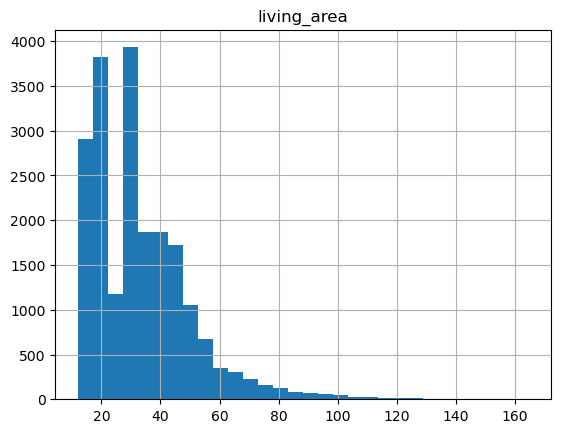

In [47]:
data.hist('living_area', bins=30);

Жилая площадь-это суммарное значение кв.м. квартиры пригодных для жизни. Проще говоря совокупность жилых комнат. На гистограмме виден сильный пик значений от 12 до чуть больше 40 кв.м. Чаще всех такие объявления выставляются на продажу в СПб и ЛО. По учетным нормам жилья на человека необходимо примерно 15 кв.м., если брать срение семьи из 2 взрослых и одного ребенка, то полученные нами данные вполне совпадают с реальностью. Следующий за ним показатель с жилой площадью примерно от 40 до 60 кв.м., тоже с не малыми колличеством значений. А кватиры с жилой площадью более 60 кв.м. продают гораздо реже.

 ***kitchen_area- площадь кухни***

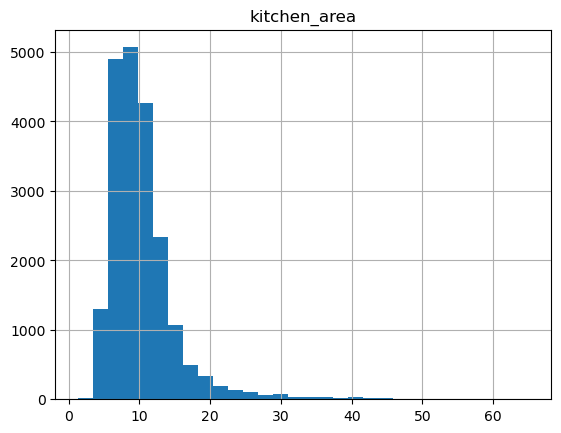

In [48]:
data.hist('kitchen_area', bins=30);

Больш е всего было в продаже квартир с площадью кухни от 8 до 15 кв.м. Таких обявлений больше 50% от общего колличества. Данные похоже на правду, ведь действительно кухни занимают небольшую часть об общей площади квартир. Также виден высокий показатель кухонь с площадь до 8 кв.м. Такие кухни характерны для домой старой постройки, а в СПБ из достаточное колличество. Квартиры с площадью более 20 кв.м. уже досточно редки, т.к. мы видим длинный "хвост" на гистограмме. Хотелось бы всем иметь большую кухню, но увы-это редкость.

***last_price-цена объекта***

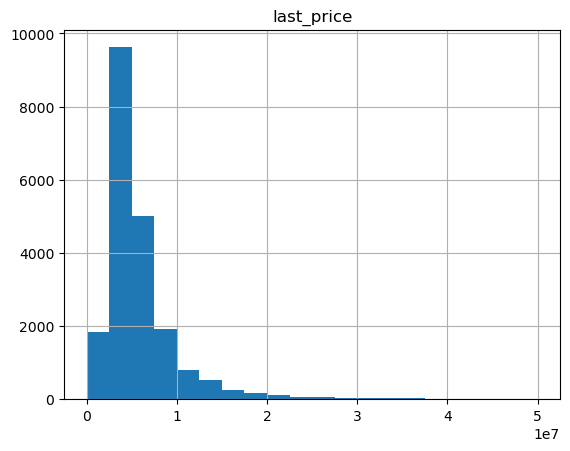

In [49]:
data.hist('last_price', range=(0,5e7), bins=20);#гистограмма по столбцу "цена объекта"

Цена объектов недвижимости в Спб в основной массе до 10 млн р. Из них преобладют объявления до 4 млн.руб. Из более дорогостоящего жилья в СПб в основном продюатся квартиры стоимотью от 10 ло 20 млн.р.

***rooms-количество комнат***

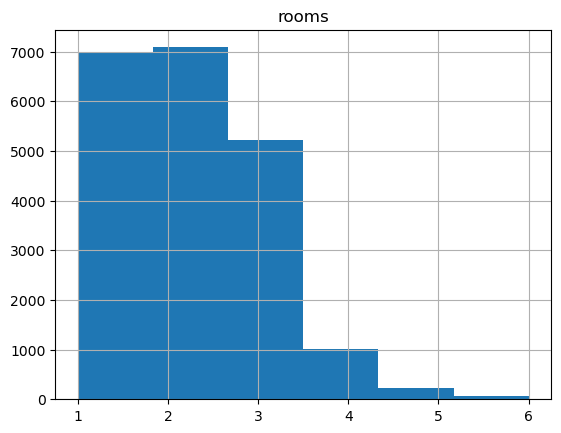

In [50]:
data.hist('rooms',bins=6);

Среди объявлнний по проджае квартир в СПб и ЛО преобладют 1-комнатные,2-комнтыне и 3-комнатые квартиры. Квартиры с большим колличеством комнат продаются гораздо реже.

***ceiling_height-высота потолков***

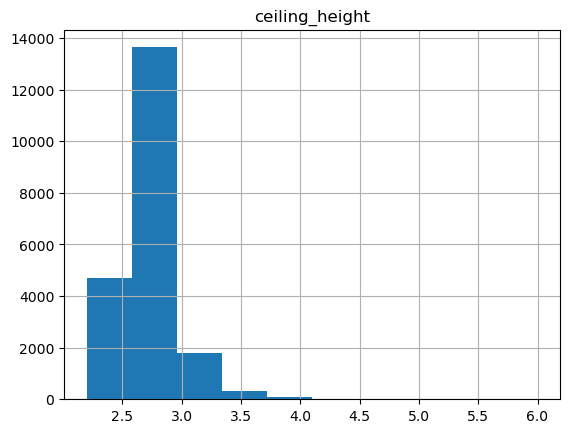

In [51]:
data.hist('ceiling_height');

Есои рассматривать параметр высоты потолков, то больше всего объвъявлений в квартирах которых потолки высотой примерно от 2.6 ло 2.8 м. Есть квартиры с выокими полтоками, скорее всего это старый фонд постройки, таких объявлений не много.

***floor-этаж квартиры***

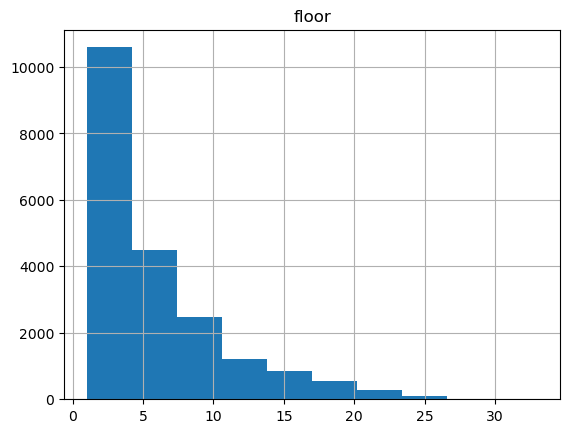

In [52]:
data.hist('floor');

Чаще всего в СПб и ЛО продаются квартиры на низких этажах, это можно объяснить тем что скорее всего в данных представлены объявления по продаже квартир в малоэтажных домах, в которых в принципе нет высокий этажей. Чем выше этаж, тем меньше обявлений о продаже можно было найти

***floor_type-тип этажа квартиры («первый», «последний», «другой»)***

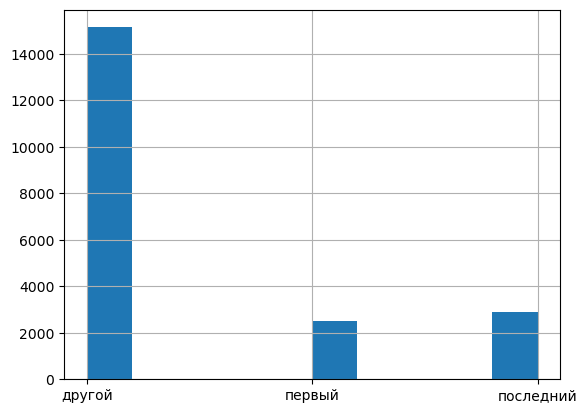

In [53]:
data['floor_type'].hist();

По гистограмме можно сделать вывод, что в объявлениях о продаже квартир реже представлены квартиры расположенные на первом и последних этажах, чем на каких-либо других.

***floors_total- общее количество этажей в доме***

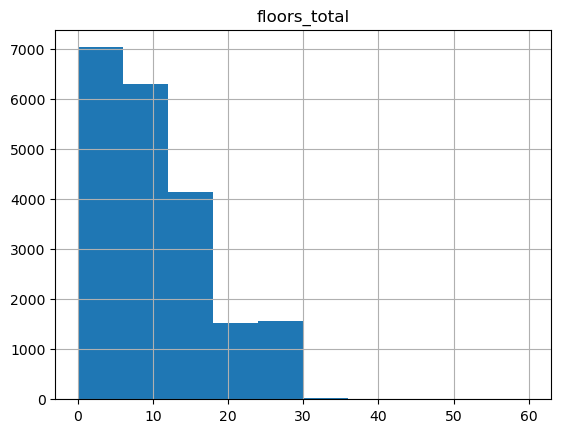

In [54]:
data.hist('floors_total');

На гистограмме видно что в данных представлены объявления о продаже квартирах в домах которых в основном до 30 этажей. Из них чаще продаются квартиры в малоэтажных домах.

***city_centers_nearest-расстояние до центра города в метрах***

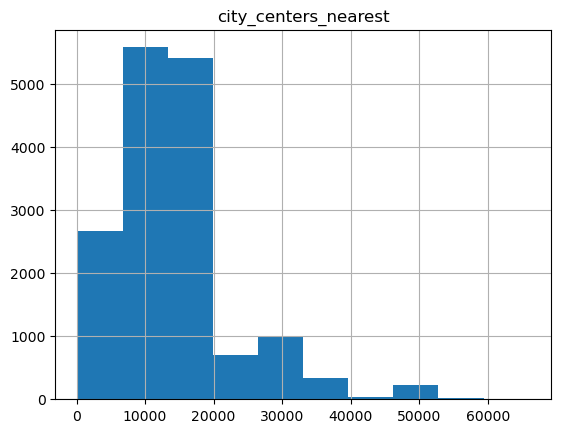

In [55]:
data.hist('city_centers_nearest');

По изначальным данные не очень понятно до центра какого города иммеется ввиду расстояние. Будем считать что до центра Санкт-Петербурга.Чаще всего продаются квартиры с удаленностью от центра на расстояние примерно от 8000 до 20000 м. В самом центре тоже достаточное колличество обявлений о продаже квартир, около 2500. Все квартиры расстояние которых более 20000 м скорее всего продаются на окраинах города или в Лен.обл. Такие объявлени можно найти гораздо реже.

***airports_nearest-расстояние до ближайшего аэропорта***

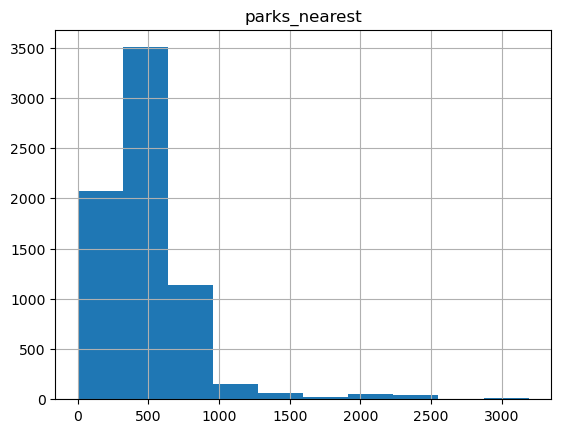

In [56]:
data.hist('parks_nearest');

Единственным гражданским аэропортом в СПб и Лен.обл. является Пулково. Большинство квартир которые продаются на в данном регионе находятся на расстоянии от 10000 ло 60000 метров. Чаще всех можно найти квартиры от которых аэропорт приммерно в 20000 метрах.

***parks_nearest-расстояние до ближайшего парка***

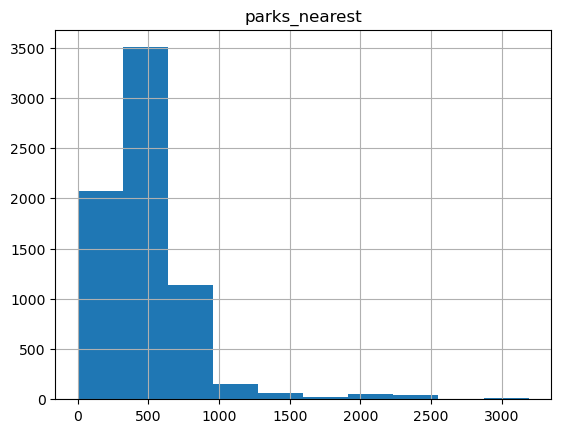

In [57]:
data.hist('parks_nearest');

У большинства квартир которые находятся в продаже есть парк в радиусе 1000 метров. Из них почти 3500 квартир имеют парк рядом с домом(500 метров)

***weekday_exposition и month_exposition -день и месяц публикации объявления***

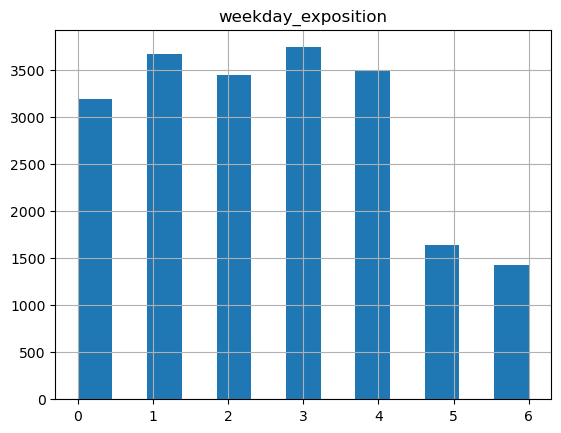

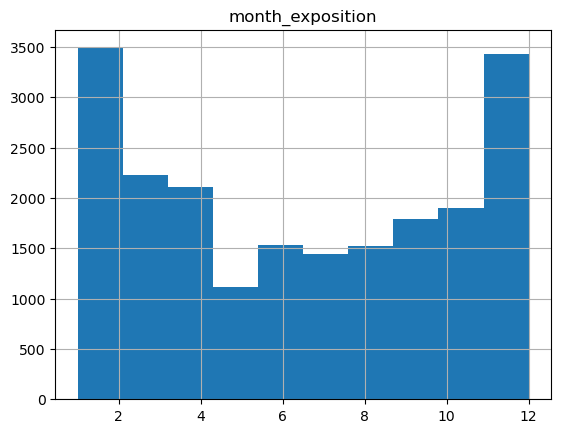

In [58]:
data.hist('weekday_exposition', bins=13);
data.hist('month_exposition');

Исходя из полученных данных видно что обычно пользователи размещают объявления по будням, реже по выходным.  
Также пик продажи квартир приходится на январь и декабрь, к лету сезон обычно снижается, а с сентября потихоньку начинает расти

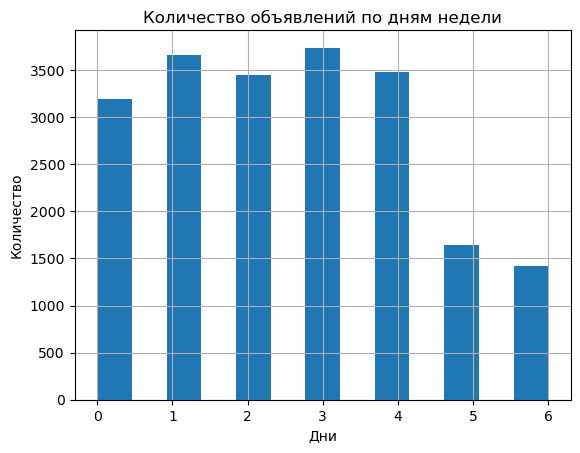

In [59]:
#Комментарий ревьювера
data.hist('weekday_exposition', bins=13)
plt.title('Количество объявлений по дням недели')
plt.xlabel('Дни')
plt.ylabel('Количество');

#### Изучение параметра "Как быстро продавалась квартира?"

Среднее значение по столбцу "Сколько дней висело объявление"- 184.63908292023433
Медиана по столбцу "Сколько дней висело объявление"- 102.0


count    17752.000000
mean       184.639083
std        220.933372
min          1.000000
25%         44.000000
50%        102.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

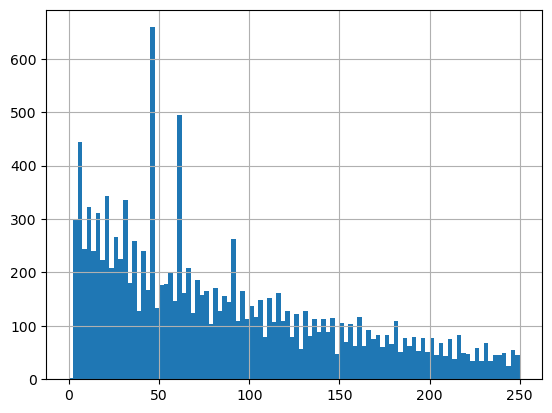

In [60]:
data['days_exposition'].hist(bins=100, range=(0,250)); # построение гистограммы
print('Среднее значение по столбцу "Сколько дней висело объявление"-', data['days_exposition'].mean()) # расчет средего
print('Медиана по столбцу "Сколько дней висело объявление"-', data['days_exposition'].median()) # расчет медианы
data['days_exposition'].describe()

Проводя анализ по столбцу "Сколько дней было размещено оьъявление" можно понять как бытро продвалась квартира, т.е. сколько дней прошло с момента публикации объявления до его снятия.Среднее значение почти в два раза превышает медиану. Это означает в данных есть хвост с сильно выделяющимеся значениями. Как мы видим на гистограмме такие "хвост" дейтсительно есть, и он сильно влияет на среднее но не медиану. Поэтому возьмем медиану за средний показатель продолжительности продажи квартиры, он равен 101 дню.
Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались по несколько лет.
Быстрой продажей можно назвать срок в 44 дней и меньше. Долгой продажей - 238 дней (7,5 месяцев) и дольше.

#### Какие факторы влияют на стоимость объекта?

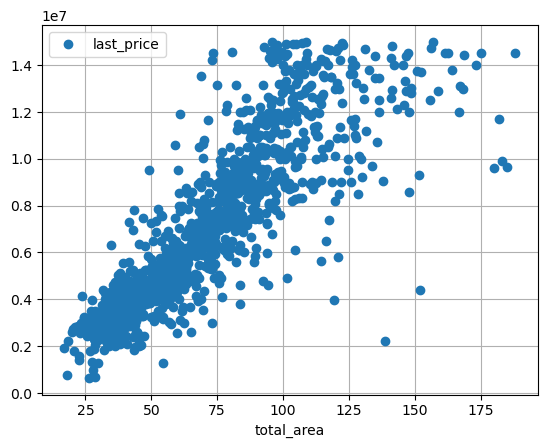

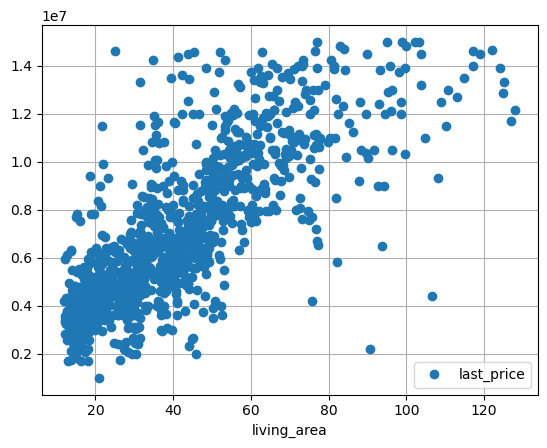

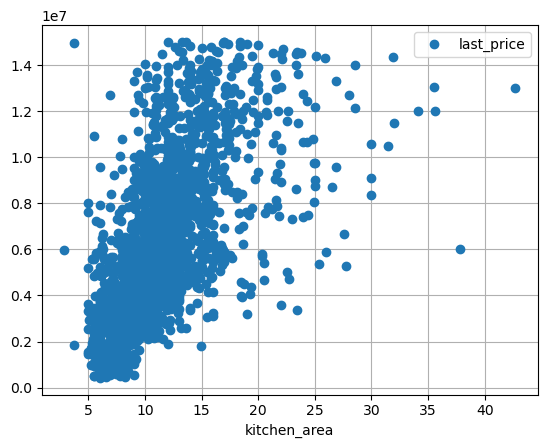

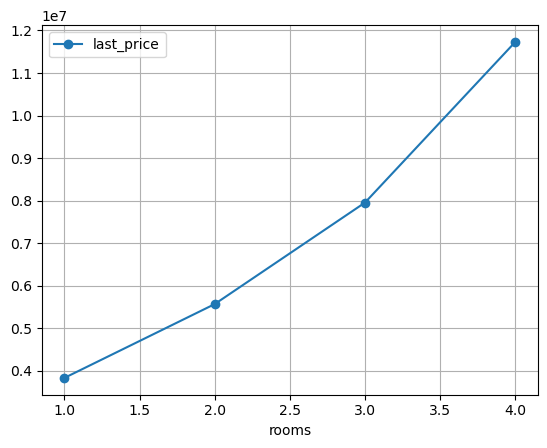

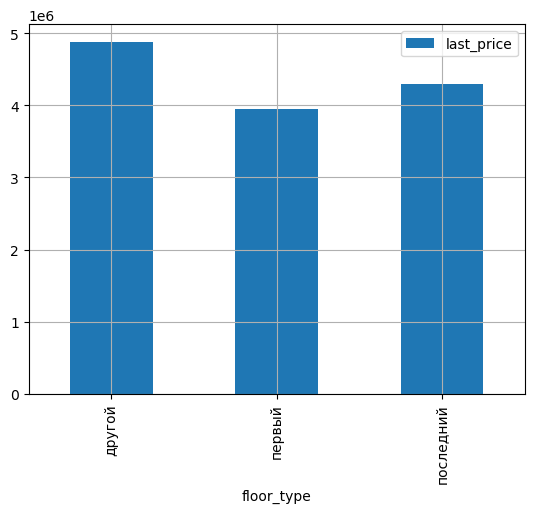

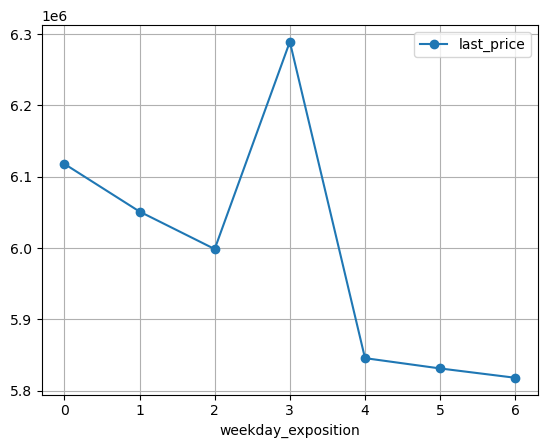

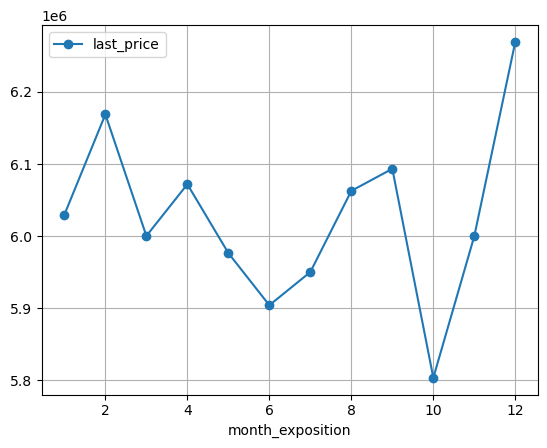

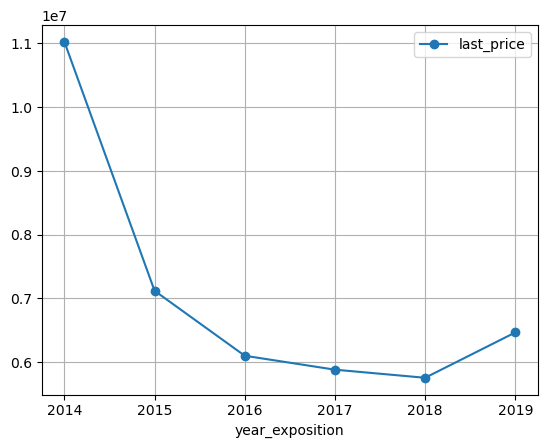

In [61]:
#При выведении графиков отстортировала столбец "последняя цена" до значения в 15 млн, такие объвления редкие и будут мешать графику

total_area_cost = data.pivot_table(index='total_area', values='last_price').reset_index()
total_area_cost
#сводная таблица по отношению цены от общей площади
total_area_cost.query('last_price<15000000').plot(x='total_area', y='last_price', style='o', grid=True)
#график зависимости цены от общей плоащди

living_area_cost = data.pivot_table(index='living_area', values='last_price').reset_index()
#сводная таблица по отношению цены от жилой площади
living_area_cost.query('last_price<15000000').plot(x='living_area', y='last_price', style='o', grid=True);
#график зависимости цены от жилой плоащади

kitchen_area_cost = data.pivot_table(index='last_price', values='kitchen_area').reset_index()
#сводная таблица по отношению цены от площади кухни
kitchen_area_cost.query('last_price<15000000').plot(x='kitchen_area', y='last_price', style='o', grid=True);
#график зависимости цены от площади кухни

rooms_cost = data.pivot_table(index='rooms', values='last_price').reset_index()
#сводная таблица по отношению цены от колличества комнат
rooms_cost.query('last_price<15000000').plot(x='rooms', y='last_price',grid=True,style='o-')
#график зависимости цены от колличества комнат

floor_type_cost = data.pivot_table(index='floor_type', values='last_price',aggfunc='median').reset_index()
#сводная таблица по отношению цены от типа этажа
floor_type_cost.query('last_price<15000000').plot(x='floor_type', y='last_price',kind='bar',grid=True, style='o-');
#график зависимости цены от типа этажа


weekday_cost = data.pivot_table(index='weekday_exposition', values='last_price').reset_index()
#сводная таблица по отношению цены от дня публикации объявления
weekday_cost.query('last_price<15000000').plot(x='weekday_exposition', y='last_price', grid=True, style='o-')
#график зависимости цены от дня публикации объявления

month_cost = data.pivot_table(index='month_exposition', values='last_price').reset_index()
#сводная таблица по отношению цены от месяца публикации объявления
month_cost.query('last_price<15000000').plot(x='month_exposition', y='last_price', grid=True, style='o-')
#график зависимости цены от месяца публикации объявления

year_cost = data.pivot_table(index='year_exposition', values='last_price').reset_index()
#сводная таблица по отношению цены от года публикации объявления
year_cost.query('last_price<15000000').plot(x='year_exposition', y='last_price', grid=True, style='o-');
#график зависимости цены от года публикации объявления

***По построенным графикам можно сделать следующие выводы:***  
 - цена зависит от общей площади,т.к. с увеличенем площади и увеличивается цена на квартиру
 - цена зависит от жилой площади. С увеличением жилой площади прослеживется увеличение цены.
 - цена равномерно растет при площади кухни до 20 кв.м., Если площадь кухни больше то этот фактор уже не влияет на цену, т.к. цены идут в разнобой;
 - цены на прямую зависит от колличетсва комнат, чем больше комнат тем выше цена квартиры;
 - цены на квартиры на первом и последнем этаже обычно чуть меньше остальных, но сильно выделяющихся значений нет.
 - что касается даты размещения объявления,то в среду обычно публикуются самые дорогие объявления. Среди месяцев заметен рост цен к концу года, летом и в октябре спад. Среди всех объявлений с 2014 по 2019 год самые дорогие квартиры продавались в 2014 году, а самые дешевые в 2018,далее цены опять пошли в рост. Я бы не сказала что есть прямая зависимость от даты размещения, а вот месяц имеет значение.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для построения данной метрики необходимо сначала найти 10 населённых пунктах с наибольшим числом объявлений:

In [62]:
top_10_location = data['locality_name'].value_counts()[0:10]
top_10_location
# срез данных по столбцу "наименование населенного пункта" с наибольшим колличествои значений

Санкт-Петербург      13773
Мурино                 452
поселок Шушары         385
Кудрово                374
Всеволожск             355
Пушкин                 331
Колпино                321
Гатчина                289
поселок Парголово      280
Петергоф               190
Name: locality_name, dtype: int64

In [63]:
location_price = data.query('locality_name in (@top_10_location.index)').pivot_table(index='locality_name', values='price_sqr_m')
#группируем данные по списку топ-10 и цене квадратного метра
location_price.sort_values(by='price_sqr_m', ascending=False)#сортируем полученные данные

,price_sqr_m
locality_name,
Санкт-Петербург,112503.660393
Пушкин,103288.734187
Кудрово,95357.859217
поселок Парголово,90492.731366
Мурино,85508.416491
Петергоф,83754.204102
поселок Шушары,78212.216867
Колпино,75129.845412
Всеволожск,69069.536132


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, возможно это из-за большого количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают, но являются Лен.обл. В данный районах большая застрока новых домой. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, они находтя уже на достаточном расстоянии о Санкт-Петербурга.

In [64]:
#Комментарий ревьювера
data.groupby('locality_name').agg({'last_price':'count',
                                 'price_sqr_m':'mean'}) \
    .sort_values('last_price', ascending=False).head(10) \
    .sort_values('price_sqr_m', ascending=False).reset_index() \
    .rename(columns={'locality_name':'Название населенного пункта',
                     'last_price':'Кол-во объявлений',
                     'price_sqr_m':'Средняя стоимость кв.м, руб.'})

,Название населенного пункта,Кол-во объявлений,"Средняя стоимость кв.м, руб."
0,Санкт-Петербург,13773,112503.660393
1,Пушкин,331,103288.734187
2,Кудрово,374,95357.859217
3,поселок Парголово,280,90492.731366
4,Мурино,452,85508.416491
5,Петергоф,190,83754.204102
6,поселок Шушары,385,78212.216867
7,Колпино,321,75129.845412
8,Всеволожск,355,69069.536132
9,Гатчина,289,68642.433735


#### Стоимость квартир в зависимости от расстояния до центра Санкт-Петербурга

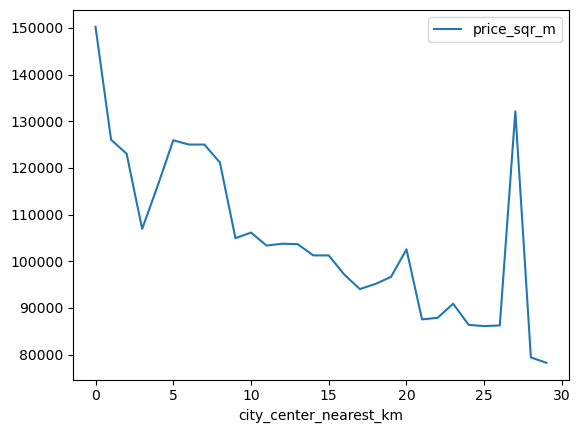

In [65]:
spb= data.query('locality_name == "Санкт-Петербург"')#срез данных по Санкт-Петербургу
spb_km = spb.pivot_table(index='city_center_nearest_km', values='price_sqr_m', aggfunc='median')
#средняя цена каждого километра по удаленности от центра СПб
spb_km.plot(); #график завимости цены от удаленности о центра СПб

На основаниии данного графика можно сделать вывод, что цена каждого километра постепенно снижается в прямой зависимости от удаленности от центра Санкт-Петербурга. После 25 км есть резкий рост стоимости жилья это можно объяснить тем что загородом есть ряд районов с элетиной недвижимостью у которой стоимость на уровне центра города.

### Общий вывод

Было проведено исследование по выявлению особенностей и закономерностей на рынке недвижимости Санкт-Петербурга и Ленинградской области. Входные данные архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах из сервиса Яндекс.Недвижиость

Задачи:
- Нужно научиться определять рыночную стоимость объектов недвижимости.
- Утановить параметры которые влияют на рыночную стоимость.

После проведенного исследовательского анализа данных выявлены следующие закономерности:

1. Факторы влияющие на стоимость жилья:  
    ***Жилая площадь*** - цена зависит от жилой площади. С увеличением жилой площади прослеживется увеличение цены.  
    ***Колличество комнат*** -  чем больше комнат тем выше цена квартиры;  
    ***Этаж***-цены на квартиры на первом и последнем этаже обычно чуть меньше остальных  
    ***Месяц продажи***-цены на продажу квартир растут к декабрю. Для покупателя лучший месяц это май, цены в этом месяце обычно ниже. Продавать квартиры лучше в декабре.  
    ***Локация***-самая высокая цена за квадратный метр в г. Санкт-Петербург, самая дешевая в г.Выборг  
    ***Удаленность от центра города*** - чем дальше от центра Санкт-Петербурга, тем дешевле стоимость квадратного метра жилья  



2. Срок продажи квартиры:  
 -Средний срок продажи квартиры в Санкт-Петербурге и Ленинградской области равен 101 дню.  
 -Быстрой продажей можно назвать срок в 44 дней и меньше.  
 -Долгой продажей - 238 дней (7,5 месяцев) и дольше.


